# Data Manipulation and Visualization with Python

In this notebook, we will cover data manipulation and visualization using Python. We will use the pandas library for data manipulation and the matplotlib and seaborn libraries for data visualization.


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for plots
sns.set(style="whitegrid")

# Reading in a Dataset and Gathering Basic Information

Let's start by reading in a CSV file and gathering basic information about the dataset.

In [25]:
# Read in the CSV file
df = pd.read_csv('mpg.csv')

# Display the first few rows of the dataframe
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Basic Information about the DataFrame

Here are some good ways to get basic information about a dataframe in Python:

- `head()`: Displays the first few rows of the dataframe.
- `tail()`: Displays the last few rows of the dataframe.
- `shape`: Returns the dimensions of the dataframe (number of rows and columns).
- `columns`: Returns the column names of the dataframe.
- `info()`: Displays the structure of the dataframe, including data types and a preview of the data.
- `describe()`: Provides summary statistics for each column in the dataframe.

In [26]:
# Display the first few rows of the dataframe
df.head()

# Get the dimensions of the dataframe
df.shape

# Get the column names of the dataframe
df.columns

# Display the structure of the dataframe
df.info()

# Provide summary statistics for each column in the dataframe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


# Data Manipulation with Pandas

We will now cover some basic data manipulation techniques using the pandas library.

In [27]:
# Create a sample dataframe
data = {
    'name': ['Andie', 'Bridger', 'Scott'],
    'gender': ['Female', 'non-binary', 'Male'],
    'male': [False, False, True],
    'income_cat': ['middle', 'poor', 'rich'],
    'park_dist': [1.0, 0.5, 0.1]
}
df_sample = pd.DataFrame(data)
df_sample

,name,gender,male,income_cat,park_dist
0,Andie,Female,False,middle,1.0
1,Bridger,non-binary,False,poor,0.5
2,Scott,Male,True,rich,0.1


## `assign()`

The `assign()` method can be used to add new columns or modify existing ones.

In [28]:
# Add 1 mile to park_dist
df_sample = df_sample.assign(park_dist=lambda x: x.park_dist + 1)
df_sample

,name,gender,male,income_cat,park_dist
0,Andie,Female,False,middle,2.0
1,Bridger,non-binary,False,poor,1.5
2,Scott,Male,True,rich,1.1


## `np.where()`

The `np.where()` function can be used to conditionally modify values in a dataframe.

In [29]:
# Correct park_dist for non-male individuals
df_sample['park_dist_correct'] = np.where(df_sample['male'] == False, df_sample['park_dist'] - 0.25, df_sample['park_dist'])
df_sample

,name,gender,male,income_cat,park_dist,park_dist_correct
0,Andie,Female,False,middle,2.0,1.75
1,Bridger,non-binary,False,poor,1.5,1.25
2,Scott,Male,True,rich,1.1,1.10


## `filter()`

Filtering rows in a dataframe can be done using boolean indexing.

In [30]:
# Filter rows where pollution_level is 'Low'
df_env_data = pd.DataFrame({
    'ecosystem': ['Forest', 'Desert', 'Wetland', 'Grassland', 'Urban'],
    'species_richness': [120, 45, 80, 60, 30],
    'pollution_level': ['Low', 'High', 'Medium', 'Low', 'High']
})
low_pollution_data = df_env_data[df_env_data['pollution_level'] == 'Low']
low_pollution_data

,ecosystem,species_richness,pollution_level
0,Forest,120,Low
3,Grassland,60,Low


## `dropna()`

Dropping rows with missing values can be done using the `dropna()` method.

In [31]:
# Drop rows with missing values in the 'ecosystem' column
df_env_data_na = pd.DataFrame({
    'ecosystem': ['Forest', 'Desert', 'Wetland', np.nan, 'Urban'],
    'species_richness': [120, 45, 80, 60, 30],
    'pollution_level': ['Low', 'High', 'Medium', 'Low', 'High']
})
df_env_data_clean = df_env_data_na.dropna(subset=['ecosystem'])
df_env_data_clean

,ecosystem,species_richness,pollution_level
0,Forest,120,Low
1,Desert,45,High
2,Wetland,80,Medium
4,Urban,30,High


## `select()`

Selecting specific columns can be done using the `loc` or `iloc` methods.

In [32]:
# Select only the 'ecosystem' and 'pollution_level' columns
pollution_data = df_env_data[['ecosystem', 'pollution_level']]
pollution_data

,ecosystem,pollution_level
0,Forest,Low
1,Desert,High
2,Wetland,Medium
3,Grassland,Low
4,Urban,High


## `groupby()`

Grouping data and calculating aggregate statistics can be done using the `groupby()` method.

In [33]:
# Group by 'ecosystem' and calculate the mean species richness
df_env_long = pd.DataFrame({
    'ecosystem': ['Forest', 'Desert', 'Wetland', 'Grassland', 'Urban', 'Forest', 'Desert', 'Wetland', 'Grassland', 'Urban'],
    'species_richness': [120, 45, 80, 60, 30, 110, 50, 85, 65, 35],
    'pollution_level': ['Low', 'High', 'Medium', 'Low', 'High', 'Low', 'High', 'Medium', 'Low', 'High']
})
df_env_grouped = df_env_long.groupby('ecosystem').species_richness.mean().reset_index()
df_env_grouped

,ecosystem,species_richness
0,Desert,47.5
1,Forest,115.0
2,Grassland,62.5
3,Urban,32.5
4,Wetland,82.5


## `agg()`

The `agg()` method can be used to apply multiple aggregation functions to grouped data.

In [34]:
# Group by 'ecosystem' and calculate the mean and total species richness
summary_table = df_env_long.groupby('ecosystem').species_richness.agg(['mean', 'sum']).reset_index()
summary_table.columns = ['ecosystem', 'mean_species_richness', 'total_species_richness']
summary_table

,ecosystem,mean_species_richness,total_species_richness
0,Desert,47.5,95
1,Forest,115.0,230
2,Grassland,62.5,125
3,Urban,32.5,65
4,Wetland,82.5,165


# Basic Data Visualization

Let's create some basic plots to visualize the data.

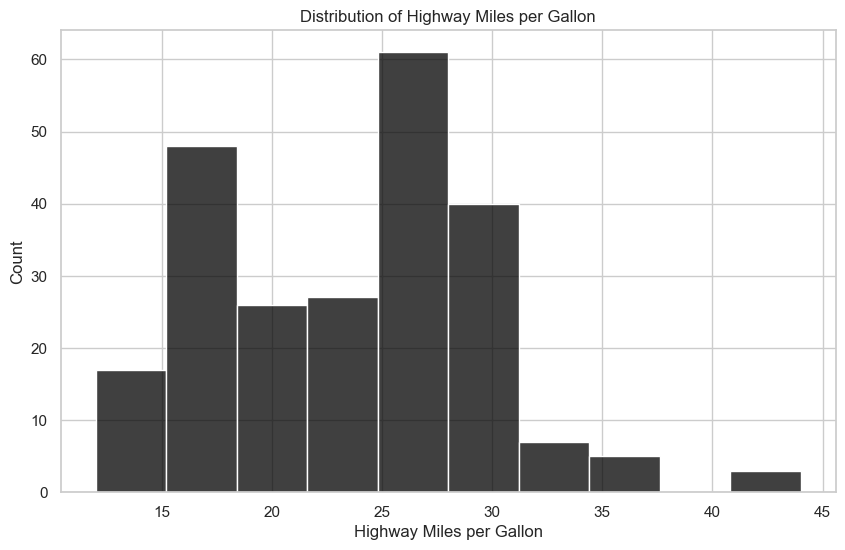

In [35]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['hwy'], bins=10, kde=False, color='black')
plt.title('Distribution of Highway Miles per Gallon')
plt.xlabel('Highway Miles per Gallon')
plt.ylabel('Count')
plt.show()

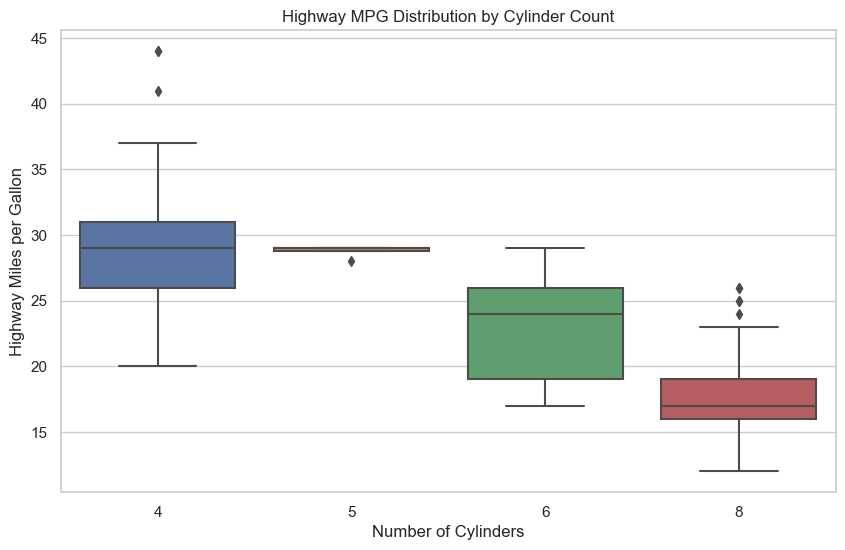

In [36]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cyl', y='hwy', data=df)
plt.title('Highway MPG Distribution by Cylinder Count')
plt.xlabel('Number of Cylinders')
plt.ylabel('Highway Miles per Gallon')
plt.show()

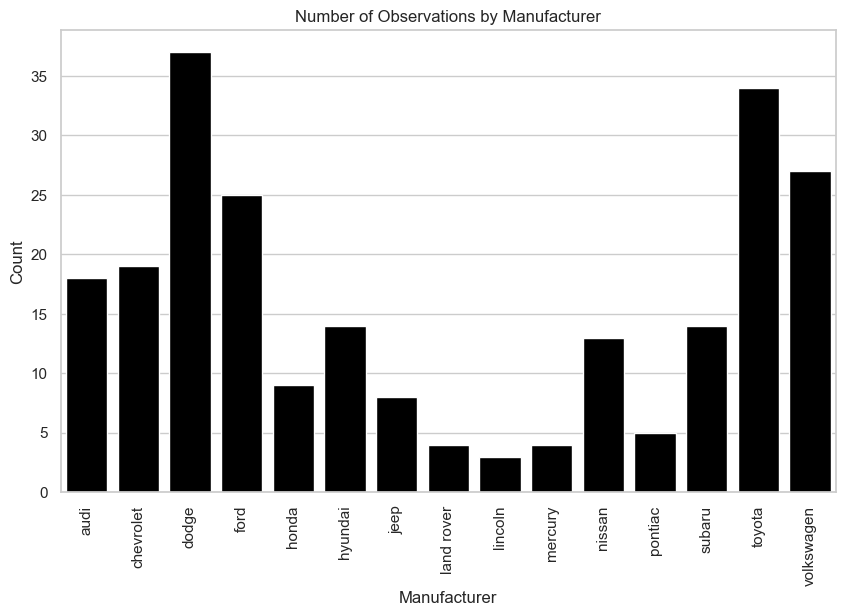

In [37]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='manufacturer', data=df, color='black')
plt.title('Number of Observations by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

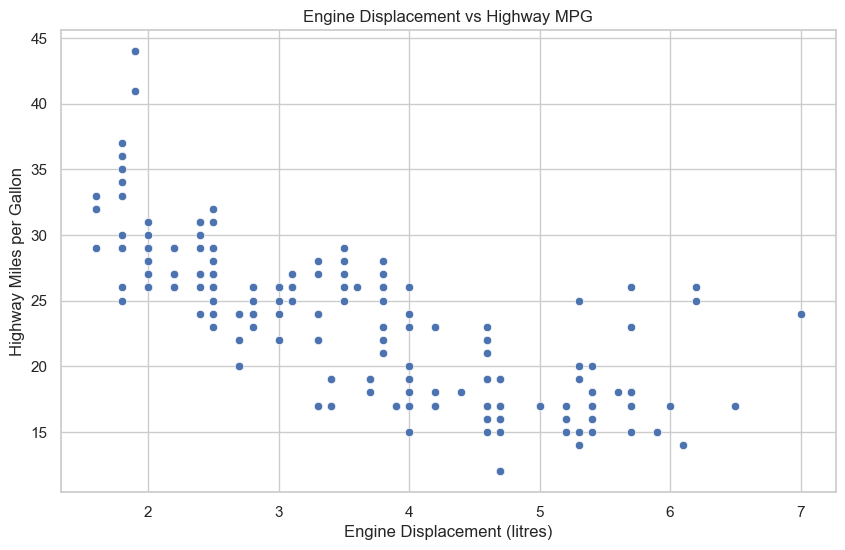

In [38]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='displ', y='hwy', data=df)
plt.title('Engine Displacement vs Highway MPG')
plt.xlabel('Engine Displacement (litres)')
plt.ylabel('Highway Miles per Gallon')
plt.show()

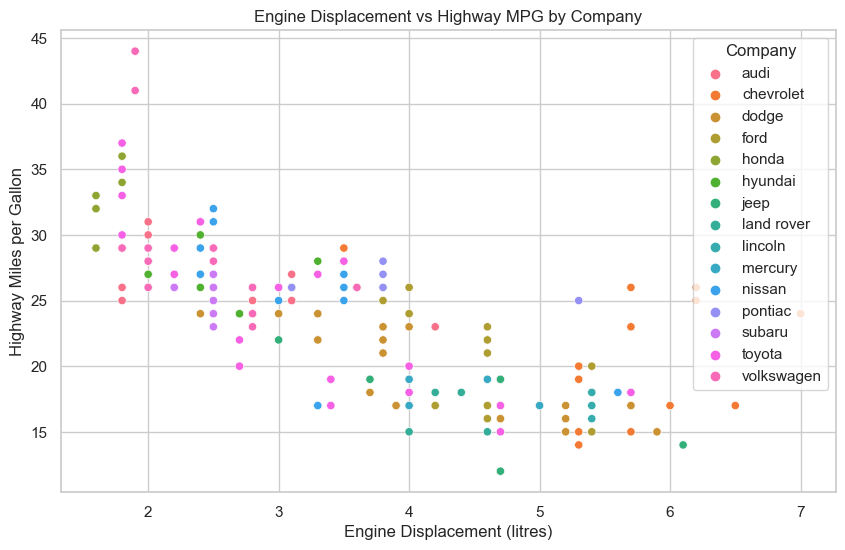

In [39]:
# Scatter plot with color grouping
plt.figure(figsize=(10, 6))
sns.scatterplot(x='displ', y='hwy', hue='manufacturer', data=df)
plt.title('Engine Displacement vs Highway MPG by Company')
plt.xlabel('Engine Displacement (litres)')
plt.ylabel('Highway Miles per Gallon')
plt.legend(title='Company')
plt.show()

/Users/a5creel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


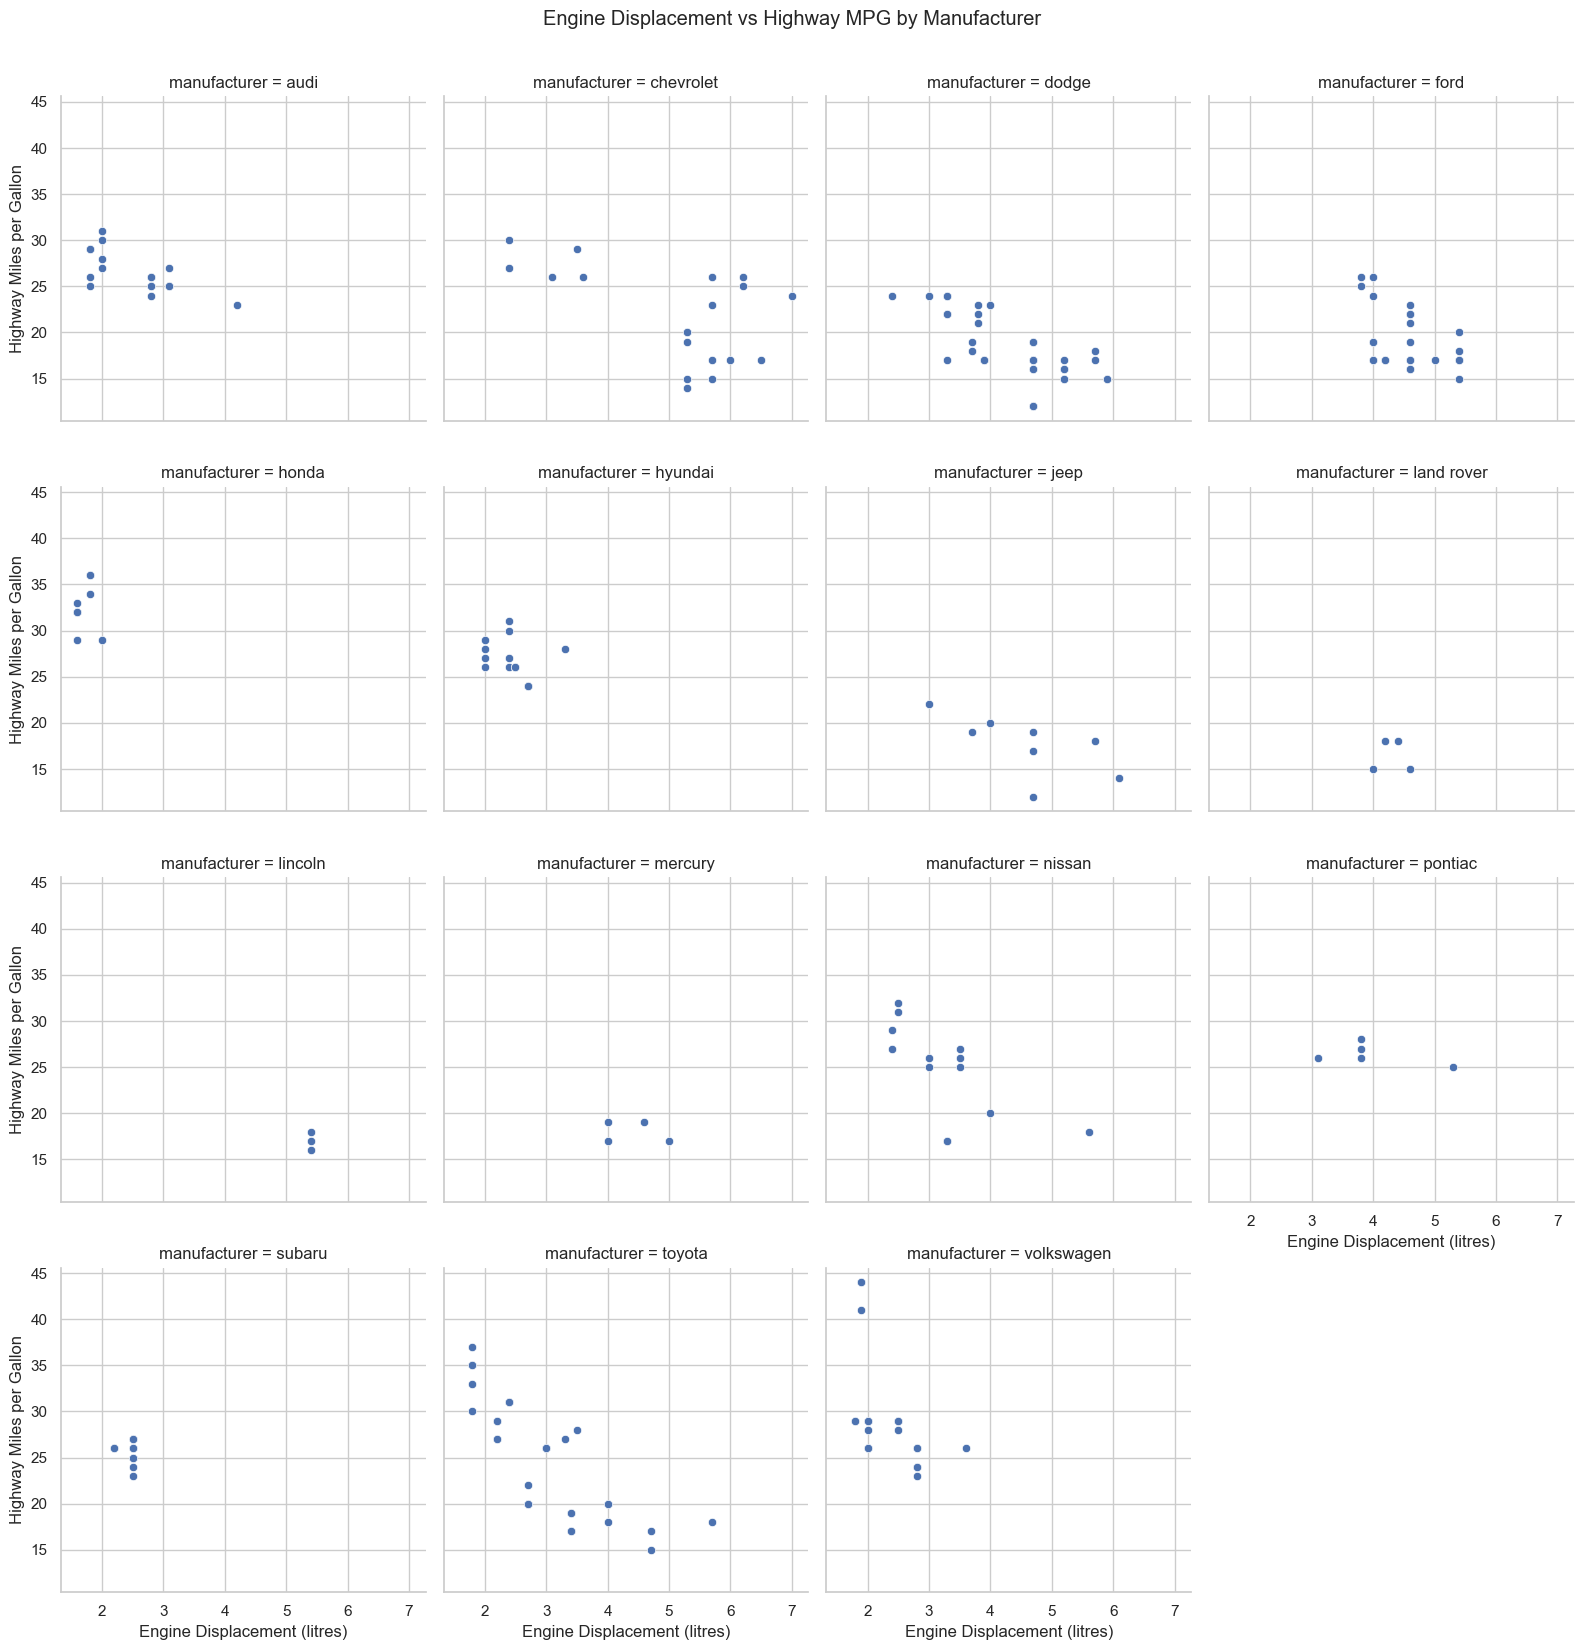

In [40]:
# Facet plot
g = sns.FacetGrid(df, col='manufacturer', col_wrap=4, height=4)
g.map(sns.scatterplot, 'displ', 'hwy')
g.set_axis_labels('Engine Displacement (litres)', 'Highway Miles per Gallon')
g.fig.suptitle('Engine Displacement vs Highway MPG by Manufacturer', y=1.03)
plt.show()